# Stochastic Process and Modeling Project
Project members are
1. Metawin Sumethiwit 633040173-4
2. Metee Yingyongwatthanakit 633040174-2

In [42]:
# import essential libraries
# 
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
sns.set_theme(style="whitegrid")

In [43]:
METEE_STUDENT_ID = 6_330_401_742
METAWIN_STUDENT_ID = 6_330_401_734
y1: int = METEE_STUDENT_ID % 1000
y2: int = METAWIN_STUDENT_ID % 1000
x0: int = y1 + y2
n = 10_000
N = 10

In [44]:
def get_nth_x(n: int) -> int:
	global x0
	if n == 0:
		return x0
	elif n >= 1:
		return (112 * get_nth_x(n - 1) % 111) + 2

In [45]:
def display_statistical_values(p: float, pn: float, mean: float, variance: float) -> None:
	global N
	print(f"X binomial({N}, {p})")
	print(f"\tMean: {mean}")
	print(f"\tVariance: {variance}")
	print(f"\tParameter p: {p}")
	print(f"\tEstimated p: {pn}")

In [46]:
def plot_histogram(p: float, data_set: np.array, plot_den: bool = False) -> None:
	global n, N
	X = stats.binom.rvs(N, p, size=n)
	# make step plot
	plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=plot_den, rwidth=0.8)
	plt.title("Histogram of X binomial random variable")
	# set x and y labels
	plt.xlabel("X")
	plt.ylabel("Frequency")
	plt.show()

In [47]:
def get_statistical_values(data_set: np.array) -> tuple:
	mean = np.mean(data_set)
	variance = stats.variation(data_set)
	pn = mean / N # estimate bernouli parameter p
	return mean, variance, pn

In [48]:
# test if function works
x1: int = get_nth_x(1)
x2: int = get_nth_x(2)
x1, x2

(35, 37)

# 1 Simulation
Study binomial random event
i.i.d binomial~(N,p)

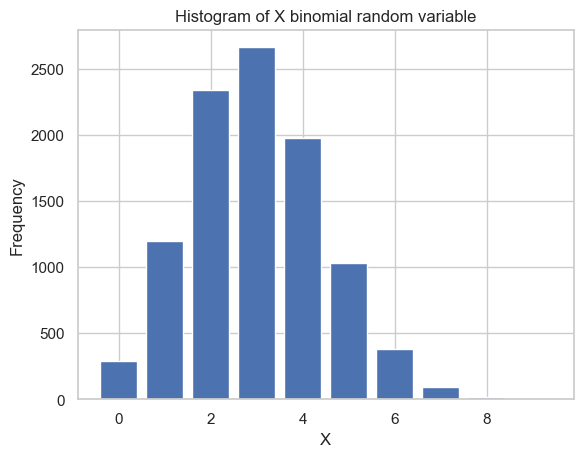

In [49]:
p: float = 0.3
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
plot_histogram(p, X)

In [50]:
display_statistical_values(p, pn, mean, variance)

X binomial(10, 0.3)
	Mean: 3.0008
	Variance: 0.4761315234981943
	Parameter p: 0.3
	Estimated p: 0.30008


### Now we change $$p = 0.31 + \frac{x_2}{1000}$$

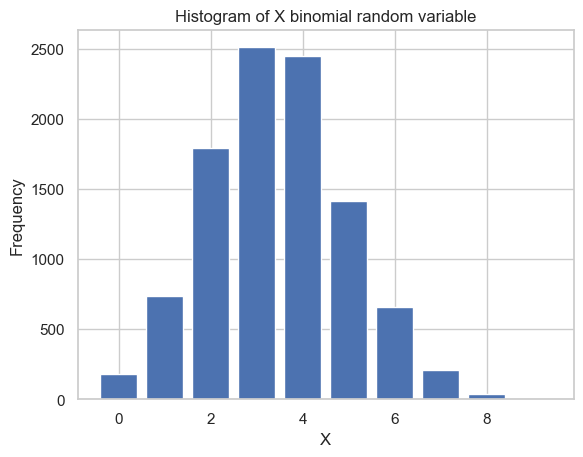

In [51]:
p: float = 0.31 + x2 / 1000
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
plot_histogram(p, X)

In [52]:
display_statistical_values(p, pn, mean, variance)

X binomial(10, 0.347)
	Mean: 3.4602
	Variance: 0.42791772467849676
	Parameter p: 0.347
	Estimated p: 0.34602


### We'll compare $p=0.3$ and $p=0.31+\frac{x_2}{1000}$ graphs together

X binomial(10, 0.3)
	Mean: 2.9996
	Variance: 0.4846491888211933
	Parameter p: 0.3
	Estimated p: 0.29996
----------------------------
X binomial(10, 0.347)
	Mean: 3.4659
	Variance: 0.437364570172065
	Parameter p: 0.347
	Estimated p: 0.34659


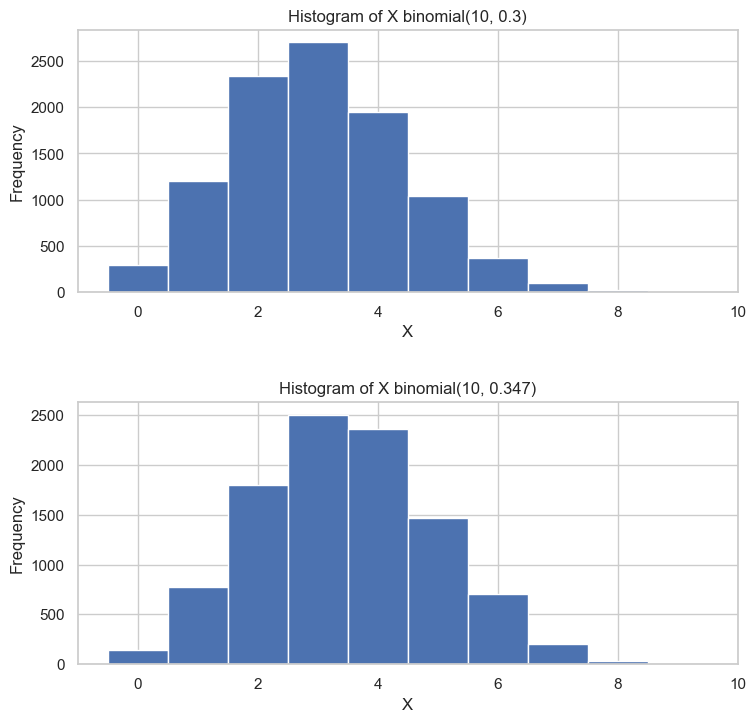

In [53]:
p: float = 0.3
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
# make step plot
fig, ax = plt.subplots(2)
fig.tight_layout(pad=2)
# set fig size
fig.set_size_inches(8, 8)
counts, bins = np.histogram(X, bins=np.arange(0, N + 1) - 0.5)
ax[0].hist(bins[:-1], bins, weights=counts)
# set x and y labels
ax[0].set_xlabel("X")
ax[0].set_ylabel("Frequency")
# print statisticical values
display_statistical_values(p, pn, mean, variance)
print("----------------------------")
p2: float = 0.31 + x2 / 1000
X2 = stats.binom.rvs(N, p2, size=n)
mean2, variance2, pn2 = get_statistical_values(X2)
counts2, bins2 = np.histogram(X2, bins=np.arange(0, N + 1) - 0.5)
ax[1].hist(bins2[:-1], bins2, weights=counts2)
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
# set x and y labels
ax[1].set_xlabel("X")
ax[1].set_ylabel("Frequency")

# set titles
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
ax[0].set_title(f"Histogram of X binomial({N}, {p})")

# print statisticical values
display_statistical_values(p2, pn2, mean2, variance2)

# 2 Validate whether Binomial~(N, pn) is a good fit to the data, X

In [54]:
# np.array of binomial random variable; X2 Binomial~(N,pn) from previous analysis
X2

array([4, 5, 3, ..., 3, 5, 3])

In [55]:
counts2

array([ 144,  773, 1801, 2505, 2364, 1463,  700,  208,   36,    6])

In [56]:
H_data = n * stats.binom.pmf(np.arange(10), N, pn2)
H_data

array([ 141.85928538,  752.46797141, 1796.10112173, 2540.56182297,
       2358.29466016, 1501.09979265,  663.52695492,  201.11792185,
         40.00481734,    4.71552476])

In [57]:
# compute a statistic Z
Z: float = np.sum(np.power((counts2 - H_data), 2) / (H_data))
Z

5.075675028947737

In [58]:
# calculate Z_alp choose alpha = 0.05
k: int = 1
alp: float = 0.05
Z_alp: float = stats.chi2.ppf(1 - alp, N - 1 - k)
Z_alp

15.50731305586545

In [59]:
# chi square test
if Z < Z_alp:
	print("Hypothesis is accepted")
	print(f"Binomial({N}, {pn2}) distribution is a good fit for the data")
else:
	print("H0 is rejected")
	print(f"Binomial({N}, {pn2}) distribution is NOT a good fit for the data")

Hypothesis is accepted
Binomial(10, 0.34659) distribution is a good fit for the data


# 3 Confidence interval for the mean


In [60]:
Sn = np.std(X2) #Compute a sample standard deviation
Sn

1.51586186375936

In [61]:
V = N - 1
y_alp_2 = stats.t.ppf(1 - alp / 2, V)
print(f"y_alp_2 = {y_alp_2:.4f}")
delta: float = y_alp_2 * Sn / (N ** 0.5)
print(f"confidence interval {mean2} +/- {delta}")
print(f"or [{mean2 - delta}, {mean2 + delta}]")


y_alp_2 = 2.2622
confidence interval 3.4659 +/- 1.084382252710395
or [2.381517747289605, 4.550282252710395]
